<a href="https://colab.research.google.com/github/AMendezCerquera/Homeworks/blob/main/Unit3_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
#Importing all the necesary libraries to plot and make data calculations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.set_style()

#Data Collection
Getting the Data

In [2]:
#Getting the data from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

Checking the first 20 rows

In [3]:
df.head(20)
#The data is about new cases of Covid-19 depending
#on the date, county, and state. The data also offers fips, amount of cases
#in that specific area, and new deaths.

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
5,2020-01-25,Orange,California,6059.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0


Describing the data

In [4]:
#Understanding the different calculations from the information on cases and deaths
df.describe()

,fips,cases,deaths
count,947306.000000,9.562160e+05,935739.000000
mean,31276.295676,2.328403e+03,58.527300
std,16302.017282,1.228538e+04,465.555423
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.300000e+01,0.000000
50%,29217.000000,2.790000e+02,5.000000
75%,46101.000000,1.199000e+03,25.000000
max,78030.000000,1.055214e+06,26398.000000


Getting all the columns with their types

In [30]:
#Finding out all the columns that the data has
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926829 entries, 0 to 956215
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    926829 non-null  datetime64[ns]
 1   county  926829 non-null  object        
 2   state   926829 non-null  object        
 3   fips    926829 non-null  float64       
 4   cases   926829 non-null  int64         
 5   deaths  926829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 49.5+ MB


#Data Wrangling
We are going to clean the data of all the null values, and make sure that the columns are in the correct type of data.


In [6]:
#Changing the type of the data column to datatime
df['date'] = pd.to_datetime(df['date'])

FIPS gives us an idea of where the different cases are located but for our analysis, we are not using this columns so we are going to drop it.

In [7]:
df.drop(['fips'], axis=1)

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
956211,2021-01-22,Sweetwater,Wyoming,3384,30.0
956212,2021-01-22,Teton,Wyoming,2870,5.0
956213,2021-01-22,Uinta,Wyoming,1887,12.0
956214,2021-01-22,Washakie,Wyoming,852,25.0


In [31]:
#Checking that the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926829 entries, 0 to 956215
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    926829 non-null  datetime64[ns]
 1   county  926829 non-null  object        
 2   state   926829 non-null  object        
 3   fips    926829 non-null  float64       
 4   cases   926829 non-null  int64         
 5   deaths  926829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 49.5+ MB


In [9]:
#Shape of the data
df.shape

(956216, 6)

In [10]:
#Check if there are null values in the data
df.isnull().sum()

date          0
county        0
state         0
fips       8910
cases         0
deaths    20477
dtype: int64

In [32]:
#There are multiple NaN values in the deaths columns
df[df['deaths'].isnull()]

,date,county,state,fips,cases,deaths


In [12]:
#There are multiple NaN values in the cases column
df[df['fips'].isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
...,...,...,...,...,...,...
955370,2021-01-22,Unknown,Puerto Rico,NaN,4171,1761.0
955382,2021-01-22,Unknown,Rhode Island,NaN,12533,74.0
955583,2021-01-22,Unknown,Tennessee,NaN,12899,120.0
955870,2021-01-22,Unknown,Utah,NaN,1406,4.0


In [13]:
#There are 7962 county where the name is unknown
df[df['county'] == 'Unknown']

,date,county,state,fips,cases,deaths
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
485,2020-03-03,Unknown,Rhode Island,NaN,2,0.0
522,2020-03-04,Unknown,Rhode Island,NaN,2,0.0
569,2020-03-05,Unknown,Rhode Island,NaN,2,0.0
...,...,...,...,...,...,...
955370,2021-01-22,Unknown,Puerto Rico,NaN,4171,1761.0
955382,2021-01-22,Unknown,Rhode Island,NaN,12533,74.0
955583,2021-01-22,Unknown,Tennessee,NaN,12899,120.0
955870,2021-01-22,Unknown,Utah,NaN,1406,4.0


We are going to remove all the data with unknown information, or NaN values.

In [14]:
df = df.dropna(axis=0, how='any')

Making sure that all three columns with possible NaN values are empty of null rows

In [15]:
df[df['deaths'] == 'NaN']

,date,county,state,fips,cases,deaths


In [16]:
df[df['fips'] == 'NaN']

,date,county,state,fips,cases,deaths


In [17]:
df[df['county'] == 'Unknown']

,date,county,state,fips,cases,deaths


In [18]:
#Making sure that we didn't drop any columns by mistake
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926829 entries, 0 to 956215
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    926829 non-null  datetime64[ns]
 1   county  926829 non-null  object        
 2   state   926829 non-null  object        
 3   fips    926829 non-null  float64       
 4   cases   926829 non-null  int64         
 5   deaths  926829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 49.5+ MB


#  EDA (Exploratory Data Analysis)

What are the counties with the most amount of cases?

In [19]:
#Getting all the different counties but making sure that the list doens't have 
#any repeated items
counties = df.county.unique()
cases_per_county = {}
#We go through the list and add all the values together that match the county
for x in counties:
  amountOfCases = df.loc[df['county'] == x, 'cases'].sum()
  cases_per_county[x] = amountOfCases
#Then we create a dictionary where the cases are stored with the name of the county for easy access to the information

In [20]:
#We find the top 10 counties by sorting the dictionary and geting a list of all the name of the counties
#depending on how many cases they have. When we now have the names, we just pass them
#them to the dictionary, and that way we get the values.
top_10_counties = sorted(cases_per_county, key=cases_per_county.get, reverse=True)[:10]
print('The counties with the most amount of cases are: ')
for x in top_10_counties:
  print(f'{x} : {cases_per_county[x]}')

The counties with the most amount of cases are: 
Los Angeles : 80522386
Cook : 48786665
Miami-Dade : 40278566
Maricopa : 38695377
Harris : 31882661
Orange : 31443166
Jefferson : 25759341
Dallas : 24205010
Suffolk : 23134184
Clark : 22393004


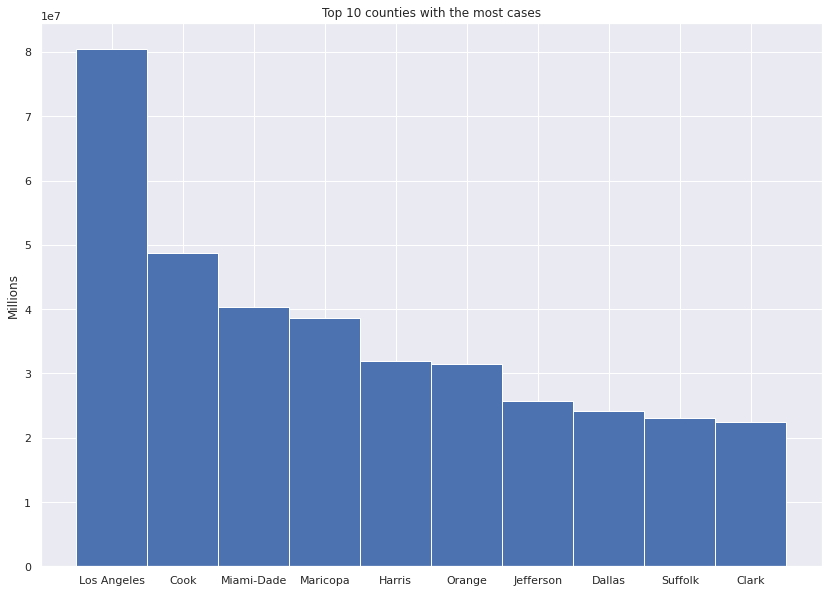

This graph shows the 10 counties with the most amount of cases 
Los Angeles is close to the 8 million cases, there needs to be increased security measurements.
The other counties have similar numbers.


In [34]:
#We use the sorted function to make sure that we have all the values sorted
#so we can later on plot with the information.
sortedList = sorted(cases_per_county.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
sorted_counties = sortedList[:10]
listCases = []
listCounties = []
fig, ax = plt.subplots(figsize=(14,10))
for x in range(10):
  listCases.append(sorted_counties[x][1])
  listCounties.append(sorted_counties[x][0])
plt.bar(listCounties, listCases, width=1)
ax.set_ylabel('Millions')
ax.set_title("Top 10 counties with the most cases")
plt.show()
print("This graph shows the 10 counties with the most amount of cases \nLos Angeles is close to the 8 million cases, there needs to be increased security measurements.")
print("The other counties have similar numbers.")

What are the states with the most amount of cases?

In [22]:
#we get the different states by going through the column and using the method unique()
states = df.state.unique()
cases_per_state = {} #A dictionary that stores all the states with their amount of cases
for x in states:
  amountOfCasesState = df.loc[df['state'] == x, 'cases'].sum() #We do the same process to match the county with all the possible rows and sum all of them
  cases_per_state[x] = amountOfCasesState

In [23]:
#We find the top 10 states by sorting the dictionary and geting a list of all the name of the states
#depending on how many cases they have. When we now have the names, we just pass them
#them to the dictionary, and that way we get the values.
top_10_states = sorted(cases_per_state, key=cases_per_state.get, reverse=True)[:10]
print('The states with the most amount of cases are: ')
for x in top_10_states:
  print(f'{x} : {cases_per_state[x]}') #Print the keys and values from the dictionary

The states with the most amount of cases are: 
California : 236034793
Texas : 204316111
Florida : 170528384
Illinois : 104613726
Georgia : 77912858
New York : 74750256
New Jersey : 70039597
Pennsylvania : 63394615
Ohio : 62150180
Arizona : 60948665


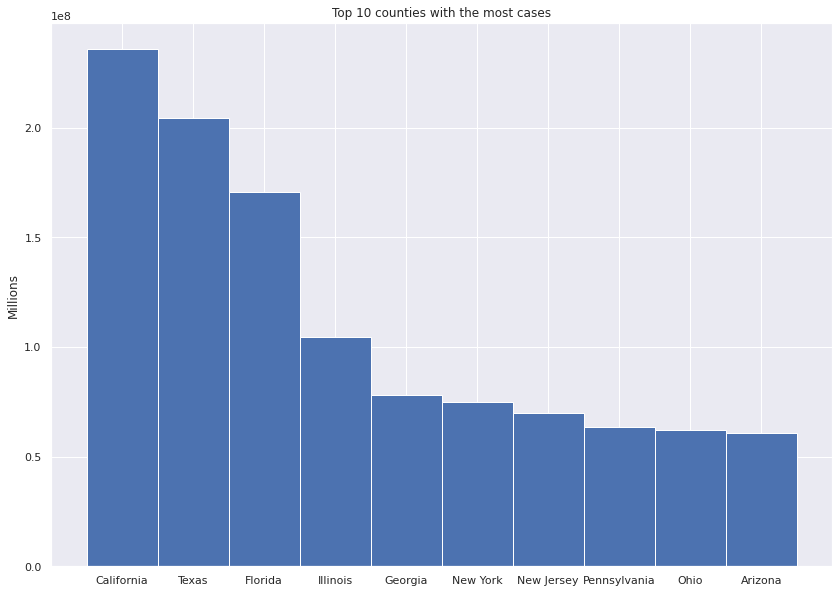

This graph shows the 10 states with the most amount of cases 
California is close to the 226 million cases, and behind there is Texas getting close to 200 million cases which shows the need for increased security measurements.
The other states have similar numbers.


In [33]:
#We use the sorted function to make sure that we have all the values sorted
#so we can later on plot with the information.
sortedStatesList = sorted(cases_per_state.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
sorted_states = sortedStatesList[:10]
listCases1 = []
listStates = []
fig, ax = plt.subplots(figsize=(14,10)) #Definind the size of the figure
for x in range(10):
  listCases1.append(sorted_states[x][1])
  listStates.append(sorted_states[x][0]) #Adding the cases and name of the states to the different lists
plt.bar(listStates, listCases1, width=1)
ax.set_ylabel('Millions')
ax.set_title("Top 10 counties with the most cases")
plt.show()
print("This graph shows the 10 states with the most amount of cases \nCalifornia is close to the 226 million cases, and behind there is Texas getting close to 200 million cases which shows the need for increased security measurements.")
print("The other states have similar numbers.")

Filtering data for a particular state

In [25]:
#Based on the code used before, we already have the information in a dictionary of all the states and counties with their amount of cases
#But we also want to know how many cases are in the state of California, and all of its counties:
californiaCounties = df[df['state'] == 'California'].county.unique()
print(f"The amount of cases in California are: {cases_per_state['California']}")
print("The counties in California, with their respective amount of cases, are:")
for x in californiaCounties:
  print(f'The amount of cases in {x} are: {cases_per_county[x]}')

The amount of cases in California are: 236034793
The counties in California, with their respective amount of cases, are:
The amount of cases in Orange are: 31443166
The amount of cases in Los Angeles are: 80522386
The amount of cases in Santa Clara are: 6532343
The amount of cases in San Francisco are: 2883536
The amount of cases in San Diego are: 15100221
The amount of cases in Humboldt are: 316316
The amount of cases in Sacramento are: 6328480
The amount of cases in Solano are: 1887522
The amount of cases in Marin are: 1484297
The amount of cases in Napa are: 534450
The amount of cases in Sonoma are: 2014448
The amount of cases in Alameda are: 5672157
The amount of cases in Placer are: 1189451
The amount of cases in San Mateo are: 2730801
The amount of cases in Contra Costa are: 4349989
The amount of cases in Yolo are: 820027
The amount of cases in Fresno are: 7070294
The amount of cases in Madera are: 1109328
The amount of cases in Riverside are: 17832748
The amount of cases in Sant

The amount of cases and deaths in the 30 most recent days in the state of California are:

In [26]:
californiaRows = df[df['state'] == 'California'] #We find a smaller table where all the rows have in common the state (California)
uniqueDaysCalifornia = df[df['state'] == 'California']['date'].unique() #We get the unique different dates, that way regardless of the county, we can count all the cases
last30Days = uniqueDaysCalifornia[-30:] #Find the 30 latest days
death_per_day = {}
cases_per_day = {}
for x in uniqueDaysCalifornia: #After creating the 2 dictionarys, we need to go through the dataframe and get the sum for each date of casea and deaths.
  amountCasesPerDay = californiaRows.loc[californiaRows['date'] == x, 'cases'].sum()
  amountDeathPerDay = californiaRows.loc[californiaRows['date'] == x, 'deaths'].sum()
  cases_per_day[x] = amountCasesPerDay
  death_per_day[x] = amountDeathPerDay

In [27]:
#Getting the daily change for cases
dailyChange = 0
for y in cases_per_day:
  if dailyChange == 0:
    dailyChange = cases_per_day[y]
    cases_per_day[y] = dailyChange
  else:
    dailyChange = cases_per_day[y] - dailyChange #We create a temporal variable so we can have the current total, so we can substract it later to find 
    temp = cases_per_day[y]                      #the daily change
    cases_per_day[y] = dailyChange
    dailyChange = temp

#Getting the daily change for deaths
dailyChange = 0
for y in death_per_day:
  if dailyChange == 0:
    dailyChange = death_per_day[y]
    death_per_day[y] = dailyChange
  else:
    dailyChange = death_per_day[y] - dailyChange
    temp = death_per_day[y]
    death_per_day[y] = dailyChange
    dailyChange = temp

In [28]:
#With the calculation above, we found the daily changes of cases, so we can print them by their date.
print("The amount of cases per day, in the last 30 days, in the state of California are: ")
for x in last30Days:
  year = pd.to_datetime(x).year
  month = pd.to_datetime(x).month
  day = pd.to_datetime(x).day
  print(f'On {month}/{day}/{year} were {cases_per_day[x]} new cases & unfortunately {death_per_day[x]} Californians died from the virus.')

The amount of cases per day, in the last 30 days, in the state of California are: 
On 12/24/2020 were 34731 new cases & unfortunately 311.0 Californians died from the virus.
On 12/25/2020 were 16772 new cases & unfortunately 20.0 Californians died from the virus.
On 12/26/2020 were 64987 new cases & unfortunately 257.0 Californians died from the virus.
On 12/27/2020 were 37555 new cases & unfortunately 62.0 Californians died from the virus.
On 12/28/2020 were 41720 new cases & unfortunately 246.0 Californians died from the virus.
On 12/29/2020 were 34166 new cases & unfortunately 425.0 Californians died from the virus.
On 12/30/2020 were 32386 new cases & unfortunately 437.0 Californians died from the virus.
On 12/31/2020 were 32264 new cases & unfortunately 574.0 Californians died from the virus.
On 1/1/2021 were 37957 new cases & unfortunately 271.0 Californians died from the virus.
On 1/2/2021 were 52197 new cases & unfortunately 306.0 Californians died from the virus.
On 1/3/2021 w

Plotting the daily amount of new cases in California

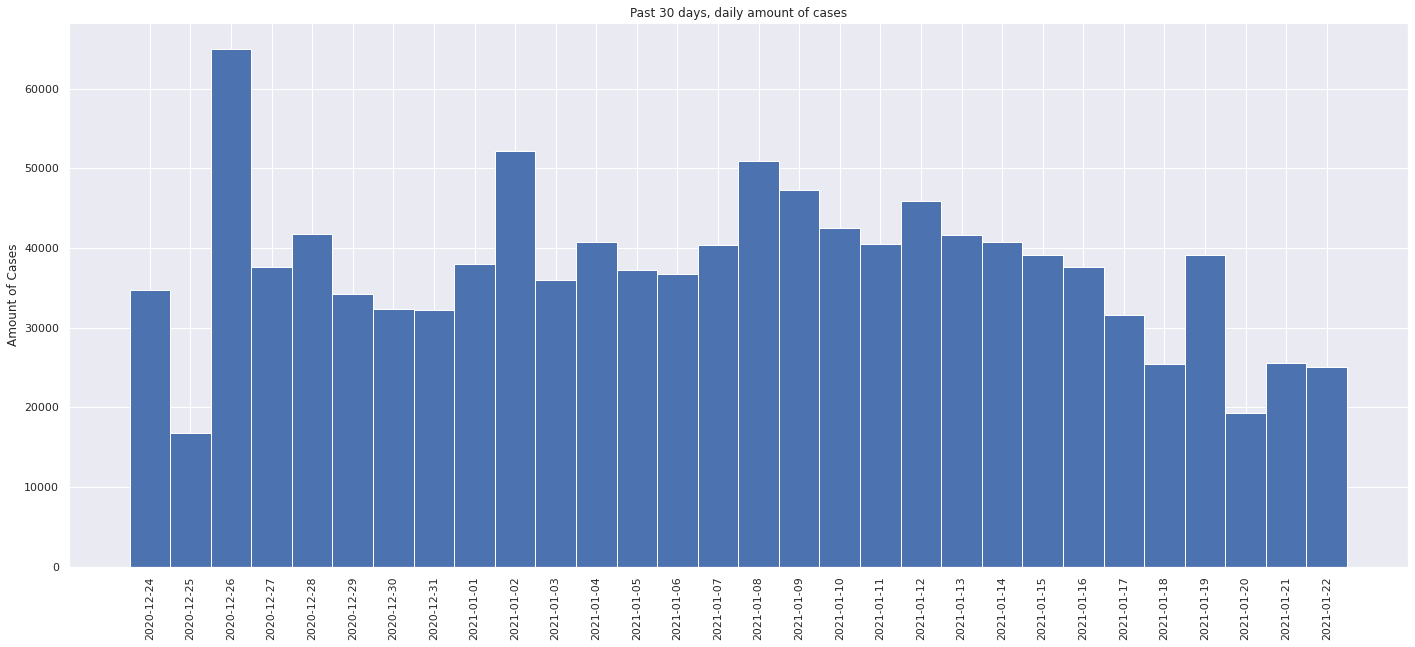

This graph shows the daily amount of new cases in the past 30 days in the state of California 
The graph shows that since the end of december, there have been efforts to keep the overall amount
of new cases stable, and after january 13th consistently decreasing.


In [35]:
#Plotting the informationm based on the calculation above.
#We create three lists so we can better organize the data and make the process of plotting easier
datesCalifornia = []
casesCalifornia = []
deathsCalifornia = []
for x in last30Days:
  datesCalifornia.append(str(pd.to_datetime(x).date()))
for y in last30Days:
  casesCalifornia.append(cases_per_day[y])
  deathsCalifornia.append(death_per_day[y])
fig, ax = plt.subplots(figsize=(24,10))
plt.bar(datesCalifornia, casesCalifornia, width=1)
plt.xticks(rotation='vertical')
ax.set_ylabel('Amount of Cases')
ax.set_title("Past 30 days, daily amount of cases")
plt.show()
print("This graph shows the daily amount of new cases in the past 30 days in the state of California ")
print('The graph shows that since the end of december, there have been efforts to keep the overall amount')
print('of new cases stable, and after january 13th consistently decreasing.')

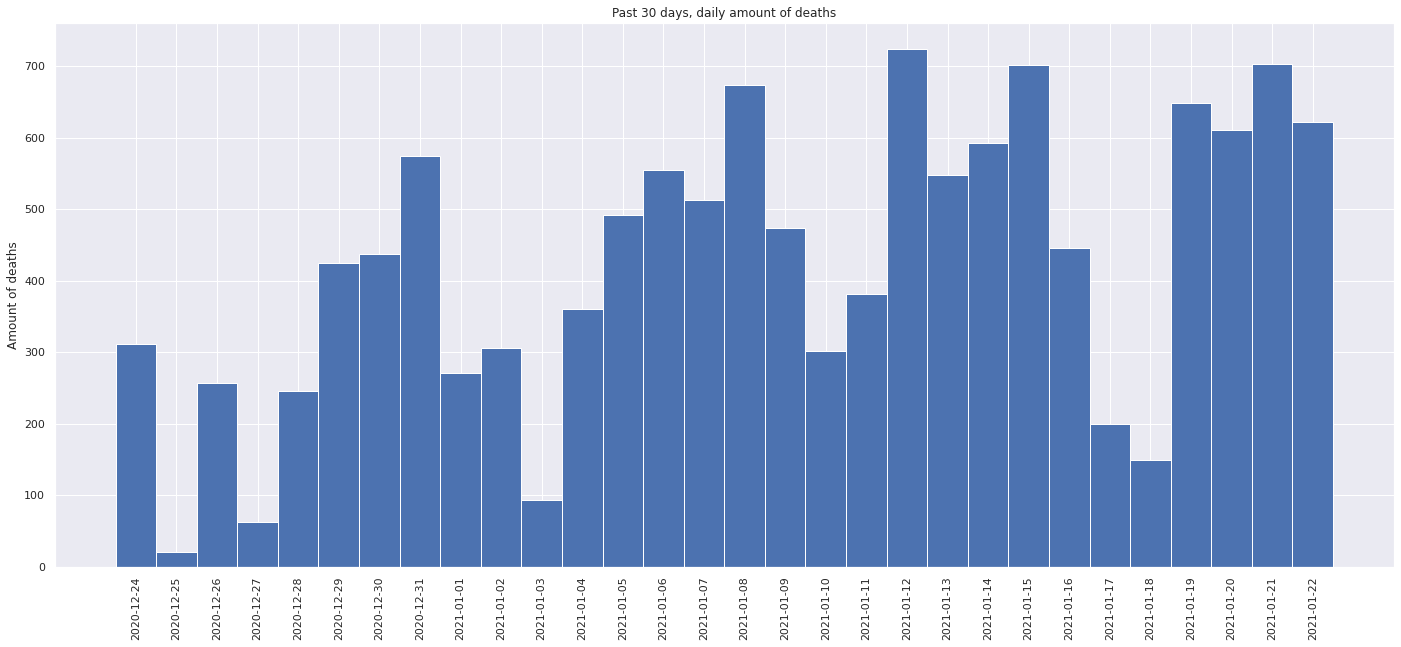

This graph shows the daily amount of deaths by the virus in the past 30 days in the state of California 
Unfortunately, the graph shows that the biggest peaks have been after the new year celebrations.


In [36]:
fig, ax = plt.subplots(figsize=(24,10))
plt.bar(datesCalifornia, deathsCalifornia, width =1)
plt.xticks(rotation='vertical')
ax.set_ylabel('Amount of deaths')
ax.set_title("Past 30 days, daily amount of deaths")
plt.show()
print("This graph shows the daily amount of deaths by the virus in the past 30 days in the state of California ")
print("Unfortunately, the graph shows that the biggest peaks have been after the new year celebrations.")

Comparing Covid 19 data of California with New York state

In [37]:
#We need to find out about all the information in the New York state
#corresponding to the past 30 daily new cases and deaths.
newYorkRows = df[df['state'] == 'New York']
newYorkRows.head()
uniqueDaysNewYork = df[df['state'] == 'New York']['date'].unique()
last30Days = uniqueDaysNewYork[-30:]
death_per_day = {}
cases_per_day = {}
for x in uniqueDaysNewYork:
  amountCasesPerDay = newYorkRows[newYorkRows['date'] == x]['cases'].sum()
  amountDeathPerDay = newYorkRows.loc[newYorkRows['date'] == x, 'deaths'].sum()
  cases_per_day[x] = amountCasesPerDay
  death_per_day[x] = amountDeathPerDay

In [38]:
#Getting the daily change for cases
dailyChange = 0
for y in cases_per_day:
  if dailyChange == 0:
    dailyChange = cases_per_day[y]
    cases_per_day[y] = dailyChange
  else:
    dailyChange = cases_per_day[y] - dailyChange
    temp = cases_per_day[y]
    cases_per_day[y] = dailyChange
    dailyChange = temp

#Getting the daily change for deaths
dailyChange = 0
for y in death_per_day:
  if dailyChange == 0:
    dailyChange = death_per_day[y]
    death_per_day[y] = dailyChange
  else:
    dailyChange = death_per_day[y] - dailyChange
    temp = death_per_day[y]
    death_per_day[y] = dailyChange
    dailyChange = temp

In [39]:
#With the calculation above, we found the daily changes of cases, so we can print them by their date.
print("The amount of cases per day, in the last 30 days, in the state of New York are: ")
for x in last30Days:
  year = pd.to_datetime(x).year #Getting the year from the date
  month = pd.to_datetime(x).month #Getting the month from the date
  day = pd.to_datetime(x).day #Getting the day from the date
  print(f'On {month}/{day}/{year} there were {cases_per_day[x]} new cases & unfortunately {death_per_day[x]} New Yorkers died from the virus.')

The amount of cases per day, in the last 30 days, in the state of New York are: 
On 12/24/2020 there were 7906 new cases & unfortunately 98.0 New Yorkers died from the virus.
On 12/25/2020 there were 8275 new cases & unfortunately 88.0 New Yorkers died from the virus.
On 12/26/2020 there were 6857 new cases & unfortunately 89.0 New Yorkers died from the virus.
On 12/27/2020 there were 4781 new cases & unfortunately 88.0 New Yorkers died from the virus.
On 12/28/2020 there were 6884 new cases & unfortunately 83.0 New Yorkers died from the virus.
On 12/29/2020 there were 6868 new cases & unfortunately 91.0 New Yorkers died from the virus.
On 12/30/2020 there were 8712 new cases & unfortunately 112.0 New Yorkers died from the virus.
On 12/31/2020 there were 10809 new cases & unfortunately 100.0 New Yorkers died from the virus.
On 1/1/2021 there were 11204 new cases & unfortunately 134.0 New Yorkers died from the virus.
On 1/2/2021 there were 9846 new cases & unfortunately 96.0 New Yorkers

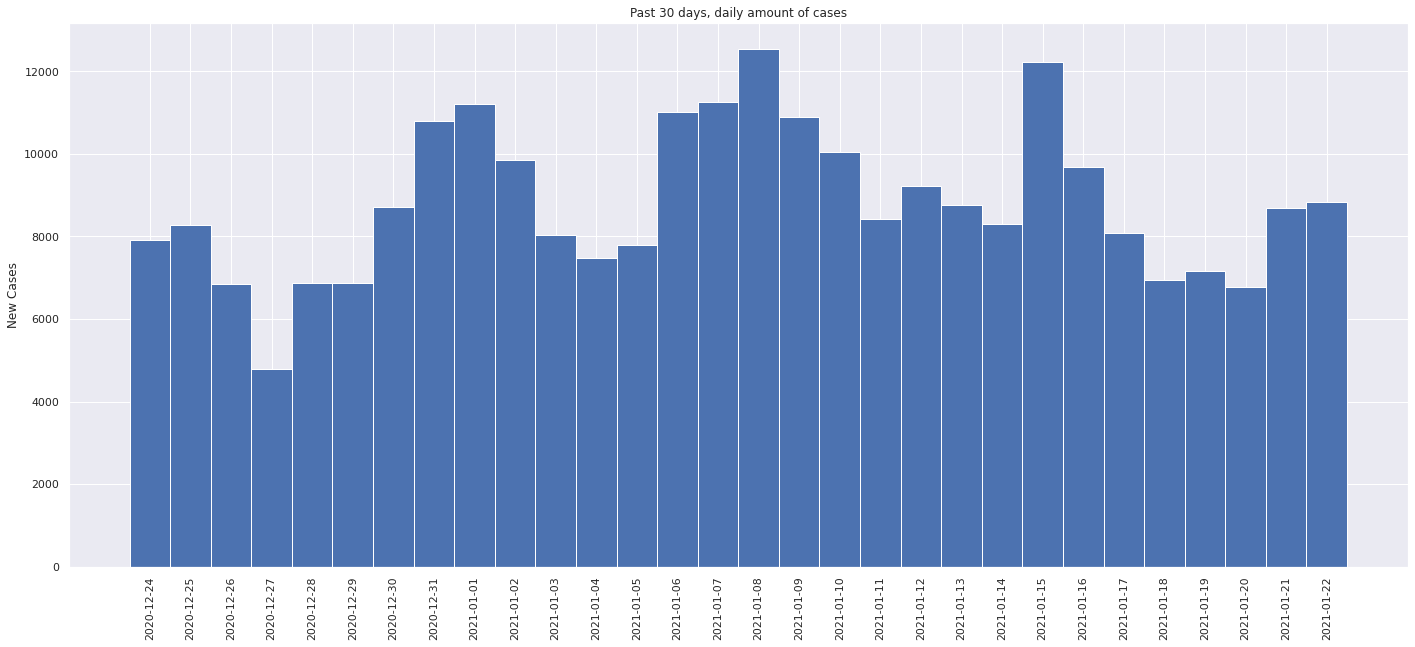

This graph shows the daily amount of new cases in the past 30 days in the state of New York 
The graph shows that the daily amount of new cases is inconsistent, where some days it keeps increasing but in other it will decrease for a couple days.
In the past 30 days, the days with the most amount of new cases were 1st of January, 7th of January, and the 15th January


In [41]:
#Plotting based on the information and calculations above.
datesNewYork = []
casesNewYork = []
deathsNewYork = []
for x in last30Days:
  datesNewYork.append(str(pd.to_datetime(x).date()))
for y in last30Days:
  casesNewYork.append(cases_per_day[y])
  deathsNewYork.append(death_per_day[y])
fig, ax = plt.subplots(figsize=(24,10))
plt.bar(datesNewYork, casesNewYork, width=1)
plt.xticks(rotation='vertical')
ax.set_ylabel('New Cases')
ax.set_title("Past 30 days, daily amount of cases")
plt.show()
print("This graph shows the daily amount of new cases in the past 30 days in the state of New York ")
print('The graph shows that the daily amount of new cases is inconsistent, where some days it keeps increasing but in other it will decrease for a couple days.')
print('In the past 30 days, the days with the most amount of new cases were 1st of January, 7th of January, and the 15th January')

This graph shows the daily amount of deaths in the past 30 days in the state of New York 


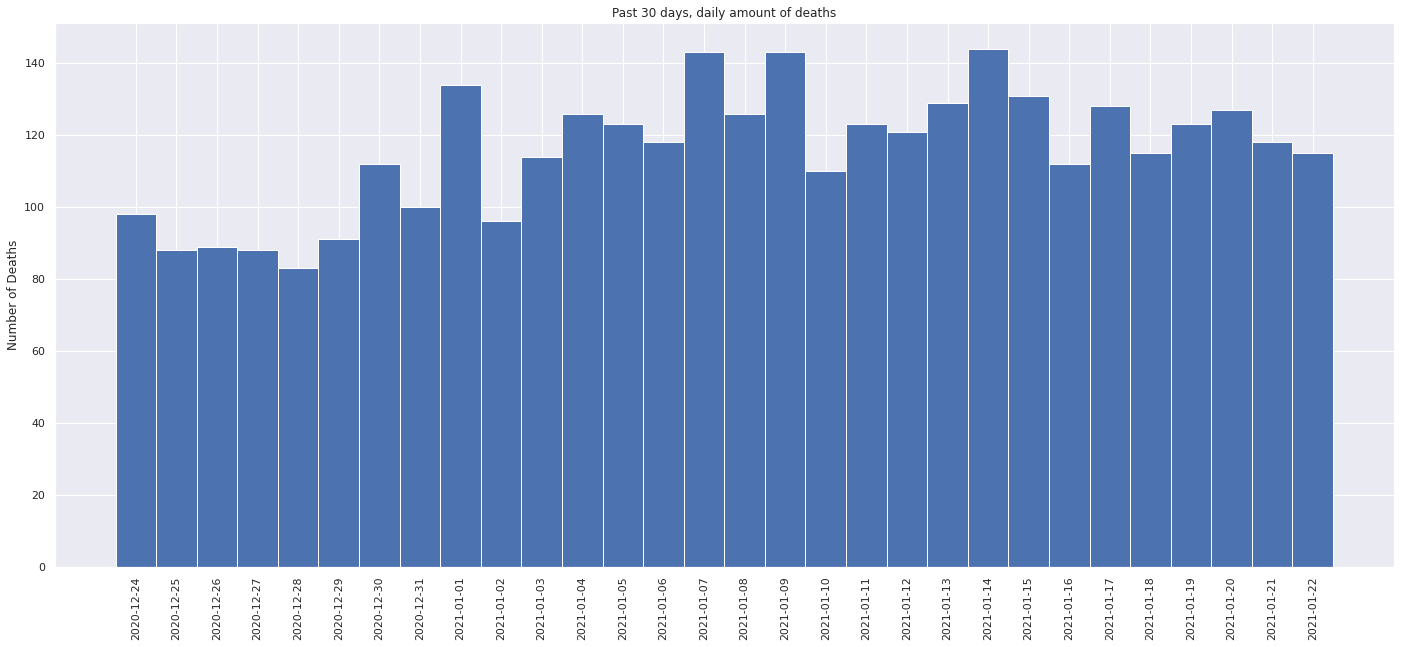

In [43]:
#Plotting the daily amount of deaths in the state of New York
fig, ax = plt.subplots(figsize=(24,10))
plt.bar(datesNewYork, deathsNewYork, width=1)
plt.xticks(rotation='vertical')
ax.set_ylabel('Number of Deaths')
ax.set_title("Past 30 days, daily amount of deaths")
print("This graph shows the daily amount of deaths in the past 30 days in the state of New York ")

Comparing the amount of daily cases in New York and California, both of them keep increasing but  the amount of new daily cases in California are in the millions 

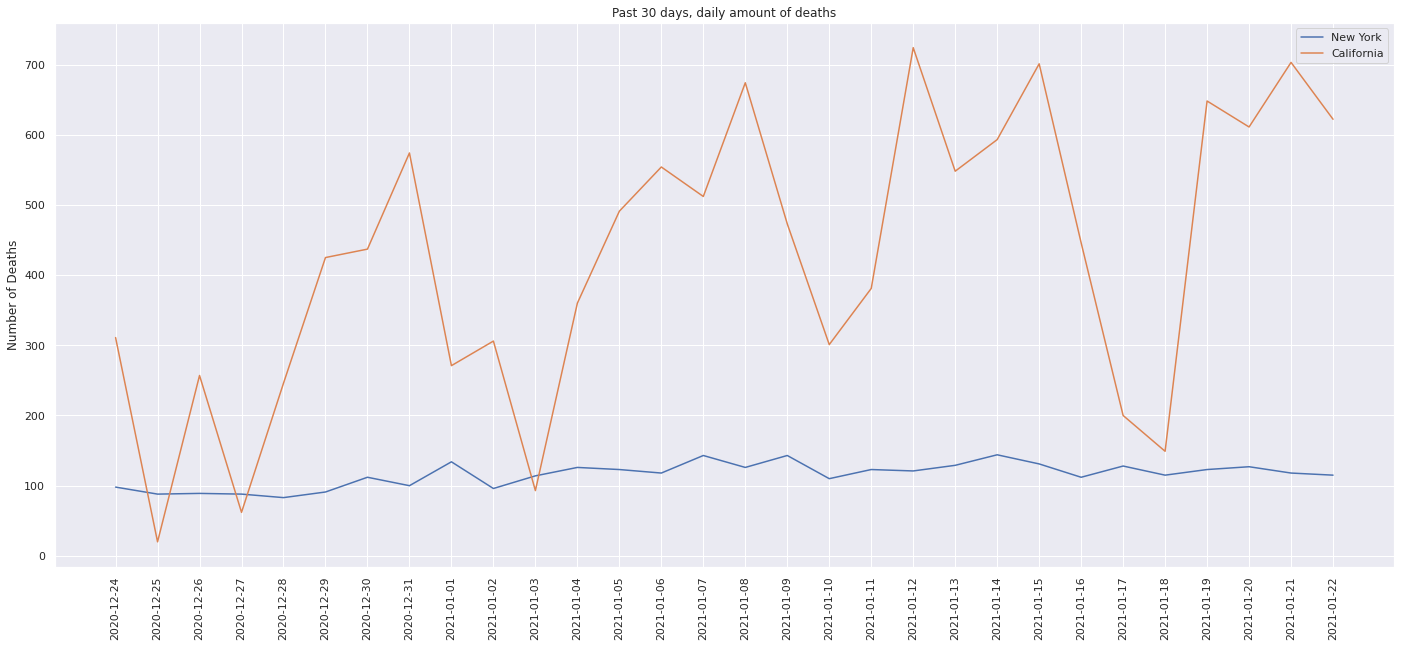

This graph shows the daily amount of deaths in the past 30 days comparing the states of New York and California
As we can tell, New York seems a more steady amount of deaths than California, which probably means that the cases are more in control
California has an erratic growth in deaths which shows how poorly the quarantine is being performed there


In [47]:
#Plotting based on the cases from California and New York states
fig, ax = plt.subplots(figsize=(24,10))
plt.plot(datesNewYork, deathsNewYork, label='New York')
plt.plot(datesCalifornia, deathsCalifornia, label='California')
plt.xticks(rotation='vertical')
ax.set_ylabel('Number of Deaths')
ax.set_title("Past 30 days, daily amount of deaths")
plt.legend(loc='best')
plt.show()
print("This graph shows the daily amount of deaths in the past 30 days comparing the states of New York and California")
print("As we can tell, New York seems a more steady amount of deaths than California, which probably means that the cases are more in control")
print("California has an erratic growth in deaths which shows how poorly the quarantine is being performed there")

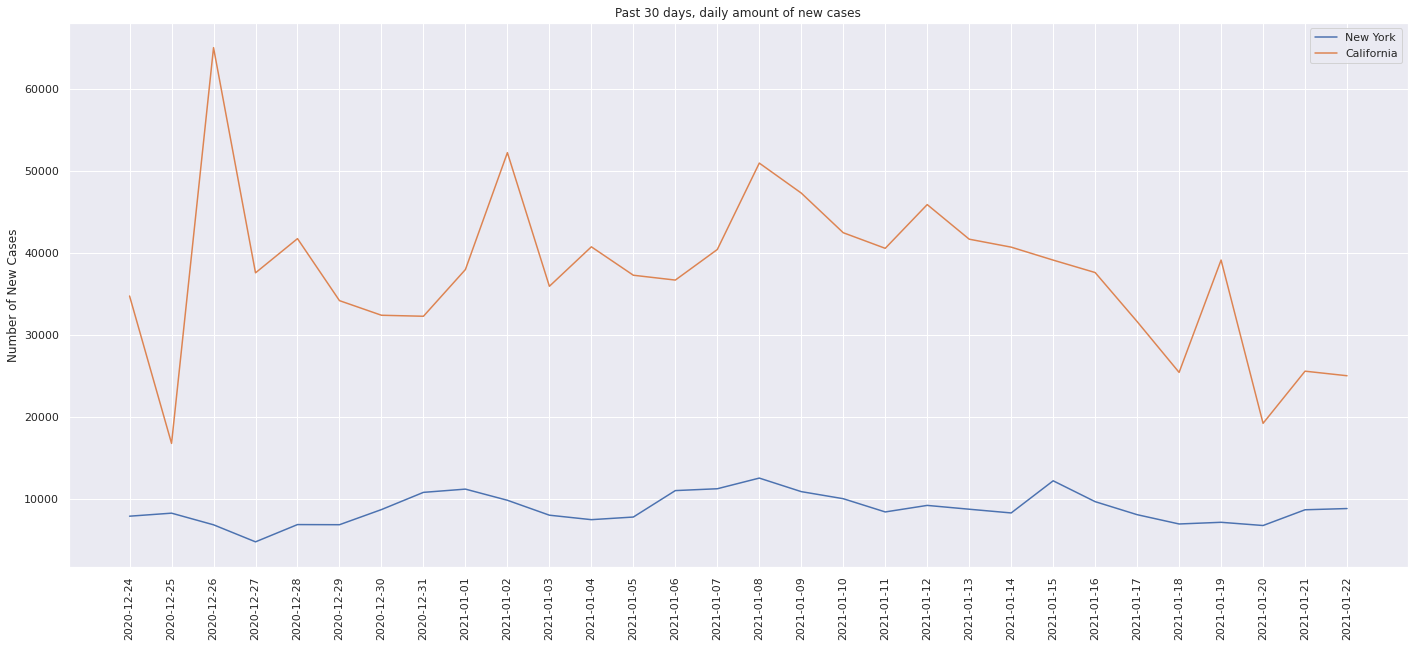

This graph shows the daily amount of deaths in the past 30 days comparing the states of New York and California
As we can tell, New York seems a more steady amount of grow of new cases than California
California has an erratic growth in cases which shows how poorly the quarantine is being performed there, yet after the 11th there seems to be a slow decrease


In [48]:
fig, ax = plt.subplots(figsize=(24,10))
plt.plot(datesNewYork, casesNewYork, label='New York')
plt.plot(datesCalifornia, casesCalifornia, label='California')
plt.xticks(rotation='vertical')
ax.set_ylabel('Number of New Cases')
ax.set_title("Past 30 days, daily amount of new cases")
plt.legend(loc='best')
plt.show()
print("This graph shows the daily amount of deaths in the past 30 days comparing the states of New York and California")
print("As we can tell, New York seems a more steady amount of grow of new cases than California")
print("California has an erratic growth in cases which shows how poorly the quarantine is being performed there, yet after the 11th there seems to be a slow decrease")

Conclusions: Comparisions between New York and California States

Both states are suffering in great scale by the Covid-19 but California looks like it is slowly creating meassures to handle the situation because the growth in the last 30 days is slowly decreasing. Unfortunately a lot of people are dying in both states, which is very concerning because it shows that the virus is easily being propagrated to more vulnerable communities. 